<a href="https://colab.research.google.com/github/Harshh18/Computer-Vision-Practicals/blob/main/Exp8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

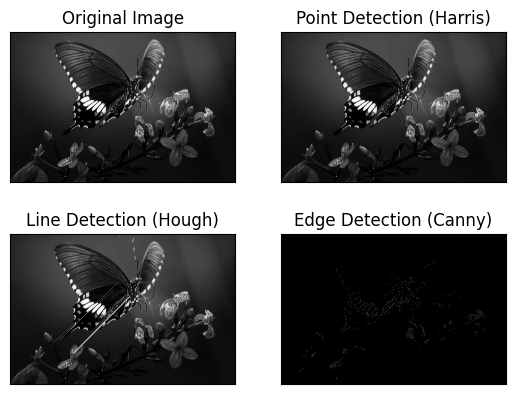

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/Butterfly-image.jpg', 0)

# Point Detection (Harris Corner Detection)
def point_detection(image):
    gray_float = np.float32(image)
    harris_response = cv2.cornerHarris(gray_float, blockSize=2, ksize=3, k=0.04)
    image[harris_response > 0.01 * harris_response.max()] = 255
    return image

# Line Detection (Hough Line Transform)
def line_detection(image):
    edges = cv2.Canny(image, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)
    line_image = image.copy()

    # Draw the lines on the image
    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            x2 = int(x0 - 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            y2 = int(y0 - 1000 * (a))
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 2)
    return line_image

# Edge Detection (Canny Edge Detector)
def edge_detection(image):
    edges = cv2.Canny(image, 100, 200)
    return edges

# Display the resulting images using matplotlib
def display_images(images, titles):
    for i in range(len(images)):
        plt.subplot(2, 2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([]), plt.yticks([])
    plt.show()

# Apply each detection technique
point_img = point_detection(image.copy())
line_img = line_detection(image.copy())
edge_img = edge_detection(image.copy())

display_images([image, point_img, line_img, edge_img],
               ['Original Image', 'Point Detection (Harris)', 'Line Detection (Hough)', 'Edge Detection (Canny)'])
